## 선형회귀 서울자전거 예제

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- 데이터 불러오기

In [3]:
df = pd.read_csv('../python/0_data/SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.columns = ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity','Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons','Holiday', 'Functioning Day']
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info() # 결측치 처리가 X 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [6]:
df.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_9928\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


- 데이터 전처리(Data Preparation)

In [7]:
# 요일 추출은 유의미한 변수가 될 수 있음
# Date라는 컬럼 -> # Month라는 컬럼을 추가 
df['Month'] = df['Date'].apply(lambda x: x.split('/')[1] + '월')

# Date 컬럼의 자료형을 datetime으로 변경
# pd.to_datetime(df['Date']) => 디폴트로 MM/DD/YYYY로 전환
# 그러므로, dayfirst = True 를 설정하여 DD/MM/YYYY로 설정해준다.
# df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
# df['Month'] = df['Date'].dt.month
df['Month']

0       12월
1       12월
2       12월
3       12월
4       12월
       ... 
8755    11월
8756    11월
8757    11월
8758    11월
8759    11월
Name: Month, Length: 8760, dtype: object

In [8]:
# 카테고리 변수 -> one-hot encoding (수치 변환)
# 카테고리 변수 중에서 증가나 감소의 의미가 있으면 one-hot encoding 사용하지 않는 것이 좋을 때도 있음(예: pclass)
# pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Month'])
df_enc = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Month'])
df_enc.head()

# 봄,여름,가을,겨울 / pclass(등급) 같은 시간, 높낮이의 의미가 있는 컬럼은 one-hot이 아닌 0,1,2,3 과 같이 표현하여 한 컬럼으로만 표현할 수 있다.

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,...,Month_03월,Month_04월,Month_05월,Month_06월,Month_07월,Month_08월,Month_09월,Month_10월,Month_11월,Month_12월
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_enc.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'Month_01월', 'Month_02월', 'Month_03월', 'Month_04월', 'Month_05월',
       'Month_06월', 'Month_07월', 'Month_08월', 'Month_09월', 'Month_10월',
       'Month_11월', 'Month_12월'],
      dtype='object')

> Input 변수와 Output 변수 분리

In [10]:
# 'Rented Bike Count', 'Date' 제외 # (8760, 29)
# df_enc.columns[2:]
# df_enc.columns.difference(['Rented Bike Count', 'Date'])

X = df_enc[df_enc.columns.difference(['Rented Bike Count', 'Date'])]
# 타겟변수 'Rented Bike Count' # (8760,)
y = df_enc['Rented Bike Count']
X.shape, y.shape

((8760, 29), (8760,))

> 머신러닝 모델을 만들기전에 어떤 전처리 ??

> Train set(80%) 과 Test set(20%) 분리 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 29), (1752, 29), (7008,), (1752,))

- 모델링(선형회귀)

In [12]:
from sklearn.linear_model import LinearRegression

- Temperature 변수만 사용하여 자전거 대여량 예측

In [13]:
reg = LinearRegression()
# fit의 의미가 학습의 의미이다. (오차를 최소화하는 가중치를 구하는 계산)
reg.fit(X=X_train[['Temperature']], y=y_train) # X는 2차원 배열로 넣어줘야해서 변수가 하나여도 대괄호를 쳐야한다

LinearRegression()

In [14]:
# W_0 
reg.intercept_

331.78038016740726

절편(intercept): 회귀직선의 절편일 때의 예측값 <br>
회귀계수(regression coefficient): 회귀직선의 기울기

In [15]:
# W_1
reg.coef_

array([29.34160985])

In [16]:
# y(자전거대여량) = w_0 + w_1 * x(온도) 
# y = 331.78038016740726 + 29.34160985 * x

In [17]:
# 예: 온도 30 -> 자전거 대여량은?
x = 30
reg.intercept_ + reg.coef_[0] * x

1212.0286755881673

In [18]:
reg.predict([  [30]
             , [35]
             , [0]
             , [-10]
             ])

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1212.02867559, 1358.73672482,  331.78038017,   38.36428169])

In [19]:
# 모델 평가(MAE, R^2)
# test_set에 예측값
y_pred = reg.predict(X_test[['Temperature']])

In [20]:
# 정답은 y_test에 있음

In [21]:
# MAE (절댓값 평균 에러)
abs(y_pred - y_test).mean()

416.2653398260372

In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

In [23]:
mean_absolute_error(y_true =y_test, y_pred=y_pred)

416.2653398260372

In [24]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [25]:
# R^2
r2_score(y_true =y_test, y_pred=y_pred)
# 오차가 많다.

0.26068022436317684

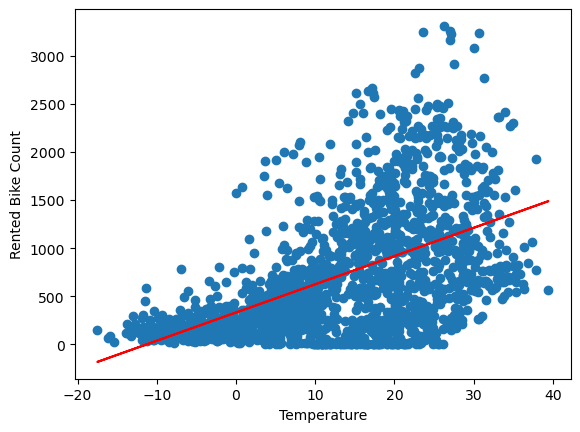

In [26]:
plt.plot(X_test['Temperature'], y_test, 'o')
plt.plot(X_test['Temperature'], y_pred, 'r')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.show()

- 시간으로 (Hour) 자전거 대여량을 예측하는 선형회귀 모델 만들고 평가(MAE, R^2)

In [27]:
reg = LinearRegression()
reg.fit(X=X_train[['Hour']], y=y_train)
y_pred = reg.predict(X_test[['Hour']])

# MAE
abs(y_pred - y_test).mean()

469.80445700960956

In [28]:
# R^2
r2_score(y_true =y_test, y_pred=y_pred)

0.15466121738474936

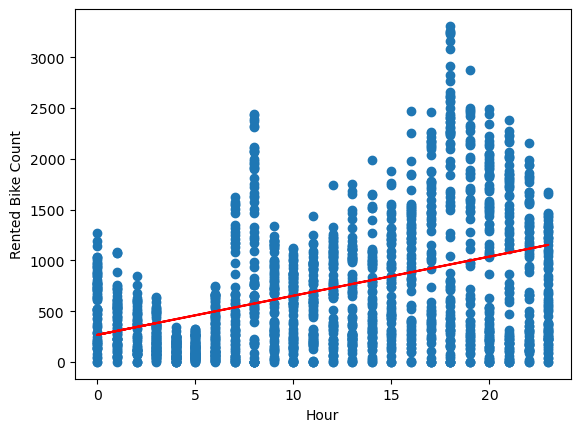

In [29]:
plt.plot(X_test['Hour'], y_test, 'o')
plt.plot(X_test['Hour'], y_pred, 'r')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

In [30]:
reg = LinearRegression()
reg.fit(X=X_train[['Hour']], y=y_train)
y_pred = reg.predict(X_test[['Hour']])

MAE = abs(y_pred - y_test).mean()
Rsquared = r2_score(y_true =y_test, y_pred=y_pred)
MAE, Rsquared

(469.80445700960956, 0.15466121738474936)

- 기온과 강수량 선형회귀 모델 만들기

In [31]:
reg = LinearRegression()
reg.fit(X=X_train[['Temperature', 'Rainfall']], y=y_train)
y_pred = reg.predict(X_test[['Temperature', 'Rainfall']])

MAE = abs(y_pred - y_test).mean()
Rsquared = r2_score(y_true=y_test, y_pred=y_pred)
MAE, Rsquared

(407.655844222717, 0.28706003242192835)

- 모든 입력 변수를 다 활용하여 자전거 대여량 예측 선형회귀 모델 만들기

In [32]:
reg = LinearRegression()
reg.fit(X=X_train, y=y_train)
y_pred = reg.predict(X_test)

MAE = abs(y_pred - y_test).mean()
Rsquared = r2_score(y_true=y_test, y_pred=y_pred)
MAE, Rsquared

(310.872983196479, 0.5833302658222703)

In [33]:
# 참고: 다변량 분석 multivariate data analysis 관련 내용 추가 학습 
# reg = LinearRegression().fit(X_train, y_train) # 특정 컬럼을 선택할 필요 X
# print('w_0: ', reg.intercept_)
# print('w_0 외 w: ', reg.coef_)

### Numpy를 활용해서 최소제곱법으로 선형회귀 구현

$(X^TX)^{-1}X^Ty$ 를 계산하여 $w$를 계산 => 331.78, 29.34가 나와야함

In [34]:
# X
np.ones((2,2)) # X_0 = 1 ( W0와 곱해지는 값(절편은 1 * w0))

# shape을 넣어주면 shape과 같은 행렬에 1을 채워줌

array([[1., 1.],
       [1., 1.]])

In [35]:
X_train[['Temperature']].shape

(7008, 1)

In [36]:
X_train_matrix = np.ones((7008, 2)) # 2 = (사용하는 변수의 개수(온도 1개) + 1) -> w의 개수도 2개가 됨
X_train_matrix[:,1] = X_train['Temperature']

In [37]:
X_train_matrix[:3,:]

array([[ 1. ,  8.2],
       [ 1. , 28.4],
       [ 1. , 29.9]])

In [38]:
# (X^T X)^-1
left_side = np.linalg.inv(np.matmul(X_train_matrix.T, X_train_matrix)) # np.linalg.inv: 역행렬함수
left_side.shape
# np.matmul: 행렬에서의 dot product 계산

(2, 2)

In [39]:
middle = np.matmul(left_side, X_train_matrix.T)
middle.shape

(2, 7008)

In [42]:
w_hat = np.matmul(middle, y_train)
w_hat.shape

(2,)

In [43]:
# [w_0, w_1]
w_hat

array([331.78038017,  29.34160985])

In [44]:
reg = LinearRegression().fit(X_train[['Temperature']], y_train)

In [45]:
reg.intercept_ # w_0

331.78038016740726

In [46]:
reg.coef_ #w_1

array([29.34160985])